In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import time

In [32]:
print("TensorFlow:", tf.__version__)
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)

TensorFlow: 2.17.0
Pandas: 2.2.2
NumPy: 1.26.4


In [36]:
# Substitui esse BTC pela ação que você quer
stock_data = yf.Ticker('BTC')

# Pega o historico do bitcoin em 5 dias, esse .history() retorna um DataFrame Pandas
hist = stock_data.history(period="ytd")

<h1>Planejamento:</h1>
<p>1- Normalize os dados!</p>
<p>2- Verifique se há algum dado vazio</p>
<P>3- Plote os dados so pra ver</P>
<p>4- Comece o Código do machine learning</p>
<p>5- Treine o Modelo</p>


Text(0, 0.5, 'Preço')

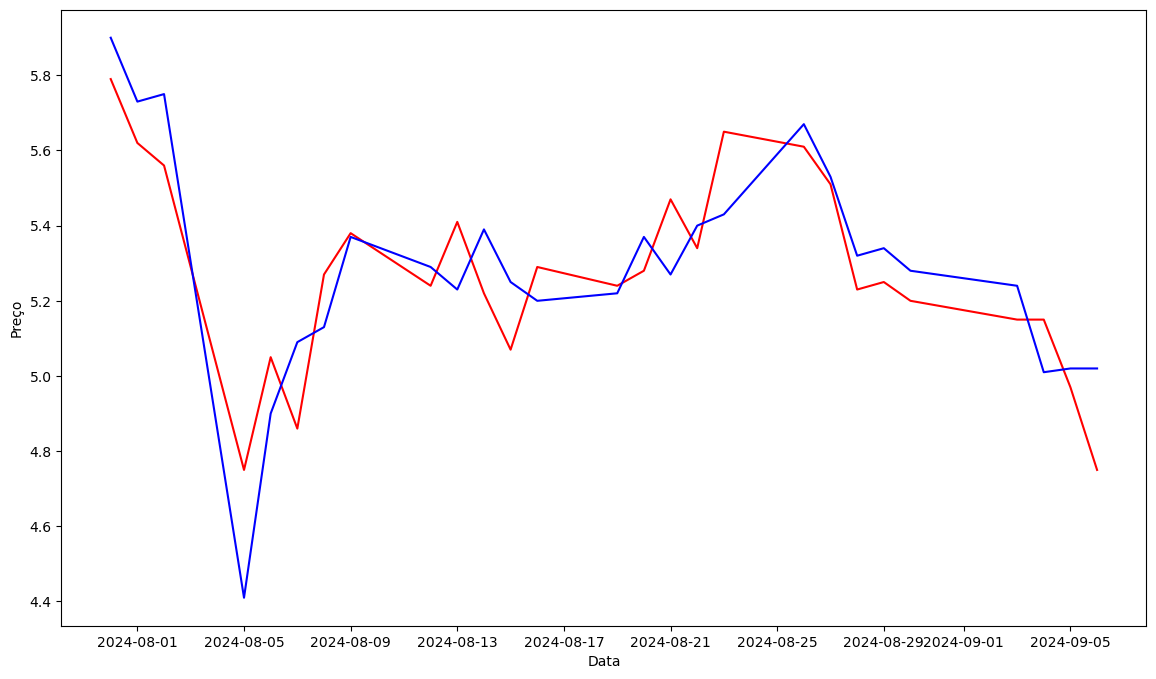

In [58]:
plt.figure(figsize=(14,8))

# Plota em Vermelho o Fechamento e Azul a Abertura

plt.plot(hist.index, hist['Close'], label='Close', color='red')
plt.plot(hist.index, hist['Open'], label='Open', color='blue')

plt.xlabel("Data")
plt.ylabel("Preço")

In [41]:
# Tira o que não tem Dado
hist = hist.dropna()
hist = hist.drop(columns=['Dividends','Stock Splits','Capital Gains'])
# Tira os dividendos que tava em 0, stock split tbm n usaremos nem o capital gains

<p>Agora só temos o valor de abertura, fechamento, o menor e o maior</p>
<p>Proximo passo é passar para tensores</p>

In [44]:
close_price = np.array(hist['Close'])
open_price = np.array(hist['Open'])


# Proporção do treino 75% dos dados
train_size = int(len(close_price)*0.80)

#Separa os dados de treinamento e teste
# Obs Série Temporal

train_data = close_price[:train_size]
test_data = close_price[train_size:]

<h1>Séries Temporais</h1>
<p>Coleção de observações feitas sequencialmente ao longo do TEMPO</p>
<p>A ordem dos dados é fundamental para a nossa análise</p>

In [47]:
#train_dataset = tf.data.Dataset.from_tensor_slices(train_data).batch(32)
#test_dataset = tf.data.Dataset.from_tensor_slices(test_data).batch(32)

#Normaliza
train_mean = train_data.mean() # Média
train_std = train_data.std() # Desvio Padrão
train_data = (train_data - train_mean) / train_std 
test_data  = (test_data - train_mean)  / train_std

train_dataset = tf.data.Dataset.from_tensor_slices((train_data,open_price[:train_size])).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data,open_price[train_size:])).batch(32)

<p>Usar uma LSTM provavelmente vai funcionar bem</p>